In [163]:
import numpy as np
import matplotlib.pyplot as plt

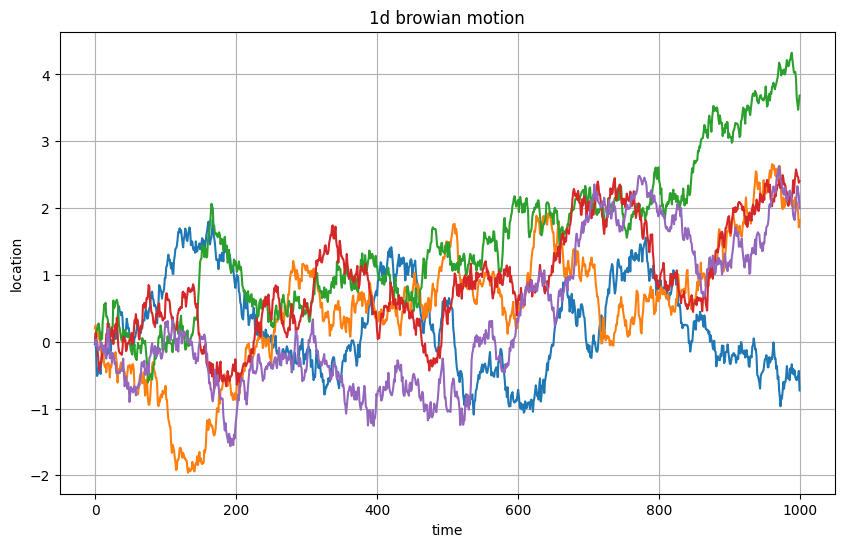

In [164]:
def brownian_motion(num_steps=1000, delta=0.1):
    """1次元ブラウン運動を生成"""
    steps = np.random.normal(0, delta, num_steps)
    return np.cumsum(steps)

# パラメータ設定
num_paths = 5  # 生成するパスの数
num_steps = 1000  # 各パスのステップ数

# 複数のブラウン運動パスを生成してプロット
plt.figure(figsize=(10, 6))
for _ in range(num_paths):
    path = brownian_motion(num_steps)
    plt.plot(path)
    
plt.title('1d browian motion')
plt.xlabel('time')
plt.ylabel('location')
plt.grid(True)
plt.show()

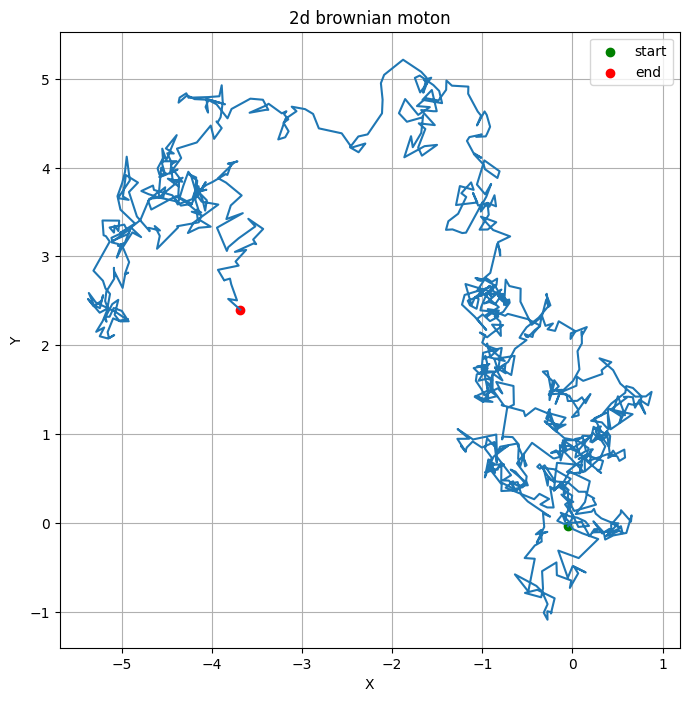

In [165]:
def brownian_motion_2d(num_steps=1000, delta=0.1):
    """2次元ブラウン運動を生成"""
    x_steps = np.random.normal(0, delta, num_steps)
    y_steps = np.random.normal(0, delta, num_steps)
    x = np.cumsum(x_steps)
    y = np.cumsum(y_steps)
    return x, y

# 2次元ブラウン運動を生成
x, y = brownian_motion_2d(1000)

# プロット
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.scatter(x[0], y[0], color='green', label='start')
plt.scatter(x[-1], y[-1], color='red', label='end')
plt.title('2d brownian moton')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

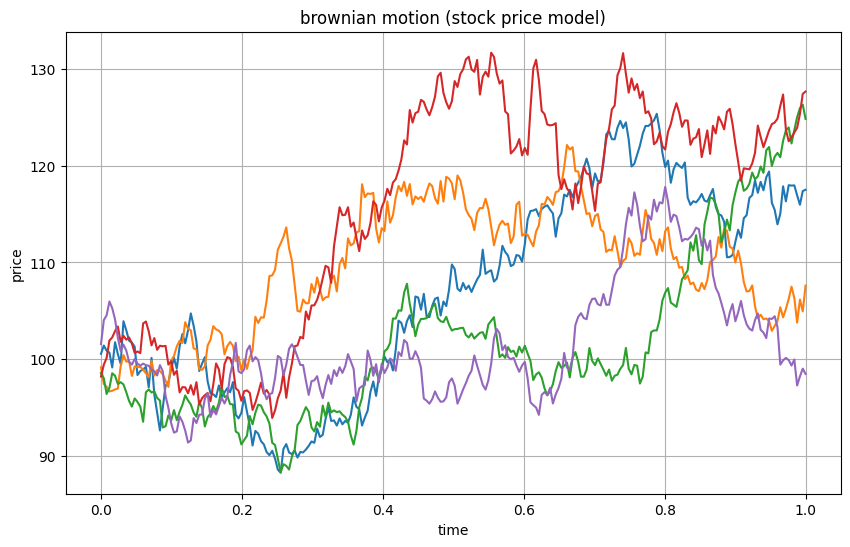

In [166]:
def geometric_brownian_motion(S0, mu, sigma, T=1, num_steps=252):
    dt = T / num_steps
    t = np.linspace(0, T, num_steps)
    W = np.random.standard_normal(num_steps)
    W = np.cumsum(W) * np.sqrt(dt) 
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) 
    return t, S

# パラメータ設定
S0 = 100  # 初期価格
mu = 0.1  # ドリフト率 (10%)
sigma = 0.2  # ボラティリティ (20%)
T = 1  # 期間 (1年)
num_paths = 5  # シミュレーションパス数

# 複数のパスを生成してプロット
plt.figure(figsize=(10, 6))
for _ in range(num_paths):
    t, S = geometric_brownian_motion(S0, mu, sigma, T)
    plt.plot(t, S)

plt.title('brownian motion (stock price model)')
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

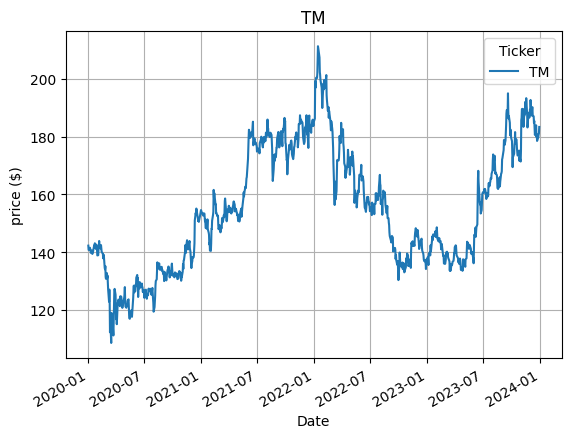

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
Date,,,,,
2020-01-02,142.240005,142.350006,141.529999,142.000000,118100
2020-01-03,140.750000,141.419998,140.300003,141.229996,174900
2020-01-06,140.770004,140.889999,139.460007,139.460007,150200
2020-01-07,141.509995,142.429993,141.360001,142.130005,123500
2020-01-08,141.160004,141.580002,140.600006,140.910004,117700
...,...,...,...,...,...
2023-12-22,178.529999,179.240005,178.000000,178.059998,322800
2023-12-26,179.850006,180.369995,178.529999,178.529999,198500


In [201]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# データ取得
ticker = "TM"  # 20年超米国債ETF
start_date = "2020-01-01"
end_date = "2023-12-31"

data = yf.download(ticker, start=start_date, end=end_date)
prices = data['Close']
data

# プロット
plt.figure(figsize=(12, 6))
prices.plot(title=f'{ticker}')
plt.ylabel('price ($)')
plt.grid(True)
plt.show()

data

In [207]:
len(prices)
print(prices)
price_log = np.log(prices)
print(price_log)
price_log_diff = price_log.diff()
print(price_log_diff)

Ticker              TM
Date                  
2020-01-02  142.240005
2020-01-03  140.750000
2020-01-06  140.770004
2020-01-07  141.509995
2020-01-08  141.160004
...                ...
2023-12-22  178.529999
2023-12-26  179.850006
2023-12-27  180.720001
2023-12-28  181.110001
2023-12-29  183.380005

[1006 rows x 1 columns]
Ticker            TM
Date                
2020-01-02  4.957516
2020-01-03  4.946985
2020-01-06  4.947127
2020-01-07  4.952370
2020-01-08  4.949894
...              ...
2023-12-22  5.184757
2023-12-26  5.192123
2023-12-27  5.196949
2023-12-28  5.199105
2023-12-29  5.211561

[1006 rows x 1 columns]
Ticker            TM
Date                
2020-01-02       NaN
2020-01-03 -0.010531
2020-01-06  0.000142
2020-01-07  0.005243
2020-01-08 -0.002476
...              ...
2023-12-22 -0.012967
2023-12-26  0.007367
2023-12-27  0.004826
2023-12-28  0.002156
2023-12-29  0.012456

[1006 rows x 1 columns]


/tmp/ipykernel_4182/3091568116.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(prices.iloc[0]) # 初期価格
/tmp/ipykernel_4182/3091568116.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(price_log_diff.mean())  # ドリフト率
/tmp/ipykernel_4182/3091568116.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(price_log_diff.std())  # ボラティリティ


0.0002527808147899736
0.0160663524620265
t [   0    1    2 ... 1003 1004 1005]
S [141.88443131 143.82366948 145.20019806 ... 157.75342164 156.96564859
 157.04284919]
t [   0    1    2 ... 1003 1004 1005]
S [142.329519   144.85858798 141.23082515 ... 129.16485094 130.20359547
 132.47232265]
t [   0    1    2 ... 1003 1004 1005]
S [141.70649332 140.99443944 140.39460077 ... 145.99138786 149.25544341
 149.53471523]
t [   0    1    2 ... 1003 1004 1005]
S [139.52330495 141.35919994 142.14979652 ... 132.99935329 131.61358423
 134.17742005]
t [   0    1    2 ... 1003 1004 1005]
S [141.49900349 142.84467544 141.8059894  ... 245.58184211 245.73013394
 250.49086535]
t [   0    1    2 ... 1003 1004 1005]
S [142.89888855 147.82767473 149.76446459 ... 139.44382654 143.76586747
 145.32464304]
t [   0    1    2 ... 1003 1004 1005]
S [142.76164788 141.82616237 142.62467699 ... 192.26532131 195.47016346
 197.69988808]
t [   0    1    2 ... 1003 1004 1005]
S [142.23451538 142.20275578 143.80140556 ... 

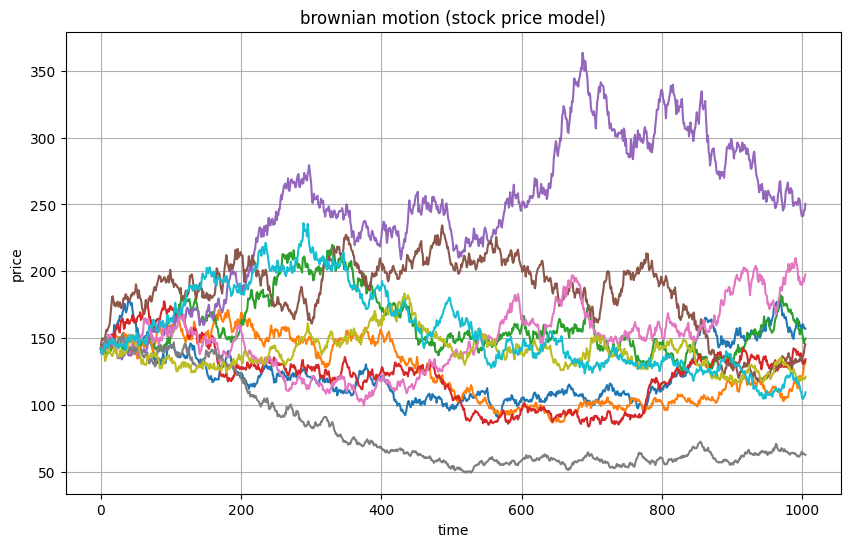

In [208]:
def geometric_brownian_motion(S0, mu, sigma, size):
    dt = 1 / size
    t = np.arange(size)
    W = np.random.standard_normal(size)
    W = np.cumsum(W)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) 
    return t, S

S0 = float(prices.iloc[0]) # 初期価格
mu = float(price_log_diff.mean())  # ドリフト率
sigma = float(price_log_diff.std())  # ボラティリティ
size = len(prices)  # 期間
num_paths = 10  # シミュレーションパス数

print(mu)
print(sigma)

# 複数のパスを生成してプロット
plt.figure(figsize=(10, 6))
for _ in range(num_paths):
    t, S = geometric_brownian_motion(S0, mu, sigma, size)
    print("t", t)
    print("S" ,S)
    plt.plot(t, S)

plt.title('brownian motion (stock price model)')
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)
plt.show()

Drift (mu): Ticker
TLT   -0.042216
dtype: float64
Volatility (sigma): Ticker
TLT    0.187971
dtype: float64


/tmp/ipykernel_4182/3704192404.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(prices.iloc[0])  # initial price


ValueError: Length of values (1006) does not match length of index (1)

<Figure size 1000x600 with 0 Axes>